In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

In [3]:
cities

['portland',
 'hermanus',
 'vaitupu',
 'taburi',
 'shahpura',
 'tombouctou',
 'lexington',
 'busselton',
 'portel',
 'new norfolk',
 'rikitea',
 'vaini',
 'mataura',
 'norman wells',
 'dikson',
 'upernavik',
 'umzimvubu',
 'ushuaia',
 'kavieng',
 'saskylakh',
 'wadi maliz',
 'kapaa',
 'ketchikan',
 'klaksvik',
 'srandakan',
 'hasaki',
 'thompson',
 'san patricio',
 'barentsburg',
 'valle de allende',
 'bluff',
 'bambous virieux',
 'maragogi',
 'lazurne',
 'port alfred',
 'chokurdakh',
 'ponta delgada',
 'saleaula',
 'fremont',
 'hobart',
 'geraldton',
 'ngorongoro',
 'puerto ayora',
 'pacific grove',
 'atuona',
 'banamba',
 'brasilia de minas',
 'porirua',
 'montebelluna',
 'sorong',
 'avarua',
 'bredasdorp',
 'arraial do cabo',
 'port elizabeth',
 'tasiilaq',
 'punta arenas',
 'poum',
 'jiexiu',
 'lagoa',
 'tsihombe',
 'qaanaaq',
 'tarko-sale',
 'medina',
 'yellowknife',
 'surt',
 'vila franca do campo',
 'castro',
 'sitka',
 'sao filipe',
 'lebu',
 'luanda',
 'kutno',
 'albany',
 'si

In [4]:
cityData = []
weather = requests.get("http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bdf79f9608469b0595e693c6a988ba65&q=chokurdakh").json()
lat = weather["coord"]["lat"]
lng = weather["coord"]["lon"]
maxTemp = weather["main"]["temp_max"]
humidity = weather["main"]["humidity"]
clouds = weather["clouds"]["all"]
wind = weather["wind"]["speed"]
country = weather["sys"]["country"]
date = weather["dt"]

cityData.append({"City": city, 
    "Lat": lat, 
    "Lng": lng, 
    "Max Temp": maxTemp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind,
    "Country": country,
    "Date": date})
print("-----------------------------")
cityData

-----------------------------


[{'City': 'saskylakh',
  'Lat': 70.62,
  'Lng': 147.9,
  'Max Temp': 59.18,
  'Humidity': 48,
  'Cloudiness': 0,
  'Wind Speed': 4.36,
  'Country': 'RU',
  'Date': 1565140215}]

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
cityData = []
for i, city in enumerate(cities):

    cityUrl = url + "&q=" + city
    print(city)
    try:
        weather = requests.get(cityUrl).json()
        lat = weather["coord"]["lat"]
        lng = weather["coord"]["lon"]
        maxTemp = weather["main"]["temp_max"]
        humidity = weather["main"]["humidity"]
        clouds = weather["clouds"]["all"]
        wind = weather["wind"]["speed"]
        country = weather["sys"]["country"]
        date = weather["dt"]

        cityData.append({"City": city, 
                          "Lat": lat, 
                          "Lng": lng, 
                          "Max Temp": maxTemp,
                          "Humidity": humidity,
                          "Cloudiness": clouds,
                          "Wind Speed": wind,
                          "Country": country,
                          "Date": date})
    except:
        print("ERROR")
        pass
    time.sleep(1)
print("-----------------------------")

portland
hermanus
vaitupu
ERROR
taburi
ERROR
shahpura
tombouctou
lexington
busselton
portel
new norfolk
rikitea
vaini
mataura
norman wells
dikson
upernavik
umzimvubu
ERROR
ushuaia
kavieng
saskylakh
wadi maliz
kapaa
ketchikan
klaksvik
srandakan
hasaki
thompson
san patricio
barentsburg
ERROR
valle de allende
bluff
bambous virieux
maragogi
lazurne
port alfred
chokurdakh
ponta delgada
saleaula
ERROR
fremont
hobart
geraldton
ngorongoro
puerto ayora
pacific grove
atuona
banamba
brasilia de minas
porirua
montebelluna
sorong
avarua
bredasdorp
arraial do cabo
port elizabeth
tasiilaq
punta arenas
poum
jiexiu
lagoa
tsihombe
ERROR
qaanaaq
tarko-sale
medina
yellowknife
surt
vila franca do campo
castro
sitka
sao filipe
lebu
luanda
kutno
albany
sioux lookout
mar del plata
bethel
kaitangata
severo-kurilsk
yulara
mount gambier
nome
jamestown
karratha
carnarvon
barrow
tyukhtet
hilo
amparafaravola
isangel
belushya guba
ERROR
turtas
saint-philippe
cabo san lucas
hithadhoo
buala
fort nelson
nikolskoye
soyo

In [42]:
cityWeather = pd.DataFrame(cityData)

cityWeather.to_csv(output_data_file, index_label="City_ID")
cityWeather.dropna()

lat = cityWeather["Lat"]
maxTemp = cityWeather["Max Temp"]
humidity = cityWeather["Humidity"]
clouds = cityWeather["Cloudiness"]
wind = cityWeather["Wind Speed"]

In [43]:
cityWeather["Max Temp"].shape

(547,)

In [44]:
cityWeather["Lat"].shape

(547,)

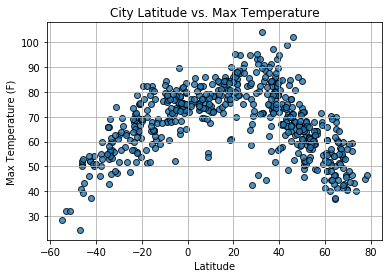

In [45]:
plt.scatter(lat, maxTemp,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/Fig1.png")
plt.show()

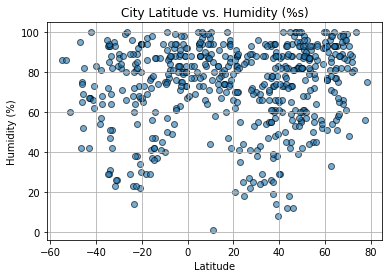

In [46]:
plt.scatter(lat, humidity,edgecolor="black", linewidths=1, marker="o", alpha=0.6, label="Cities")

plt.title("City Latitude vs. Humidity (%s)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/Fig2.png")
plt.show()

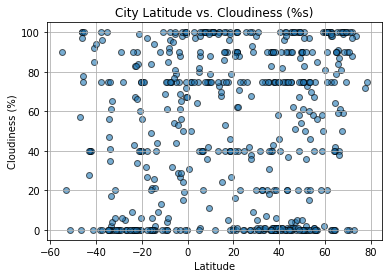

In [47]:
plt.scatter(lat, clouds,edgecolor="black", linewidths=1, marker="o", alpha=0.6, label="Cities")

plt.title("City Latitude vs. Cloudiness (%s)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/Fig3.png")
plt.show()

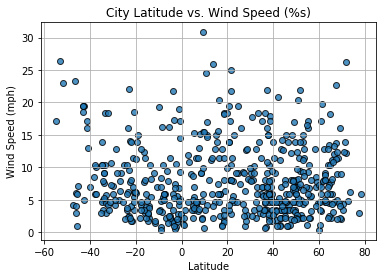

In [48]:
plt.scatter(lat, wind,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed (%s)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/Fig4.png")
plt.show()